In [ ]:
!pip install pandas openai requests
!pip install tqdm
!pip install python-docx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import needed packages
import os
import pandas as pd
import openai
import requests
from tqdm import tqdm
import time
import docx
from matplotlib import pyplot as plt

In [ ]:
# Set up the OpenAI API
openai.api_key = "API Key OPEN-AI hier einfügen"
GPT_API_URL = "https://api.openai.com/v1/chat/completions"

In [ ]:
# import reviews
df = pd.read_csv("drive/MyDrive/Colab_Notebooks/VetTrust_reviews_export.csv", delimiter=";", encoding="utf-8-sig")

In [ ]:
df[["text"]].dropna()

,text
0,(Translated by Google) Excellent (Original) super
3,(Translated by Google) Very pleasant experienc...
6,(Translated by Google) Just such a great team....
8,(Translated by Google) Very good and friendly ...
11,(Translated by Google) One can only wish for s...
...,...
2989,"(Translated by Google) The vets are very nice,..."
2991,(Translated by Google) Competent specialist st...
2992,(Translated by Google) Everything went like cl...
2995,(Translated by Google) Very competent and good...


In [ ]:
df.loc[[264, 519], ['text']]

,text
264,Schlechte ärztin
519,Beste Behandlung für Oscar


In [ ]:
# data cleaning and preparation
df = df[["lang", "score", "text", "user_name", "input_url"]].dropna()
df = df.loc[(df["lang"] == "de")]

# only keep the orginal text, not the translation
df["text"] = df["text"].str.split("(Original)").str[-1]
df["text"] = df["text"].str.replace(")", "")

# specific encodings for ä,ü,ö
df["text"] = df["text"].str.replace("Ã¼","ü")
df["text"] = df["text"].str.replace("Ã¤","ä")
df["text"] = df["text"].str.replace("Ã¶","ö")
df["text"] = df["text"].str.replace("ðÿ","👍")
df["text"] = df["text"].str.replace("ãÿ", "ß")

df["user_name"] = df["user_name"].str.replace("Ã¼","ü")
df["user_name"] = df["user_name"].str.replace("Ã¤","ä")
df["user_name"] = df["user_name"].str.replace("Ã¶","ö")

# Reset index
# df = df.reset_index(drop=True)

<ipython-input-6-2367a290ffcf>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["text"] = df["text"].str.replace(")", "")


(array([ 143.,    0.,   39.,    0.,    0.,   28.,    0.,   90.,    0.,
        1117.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

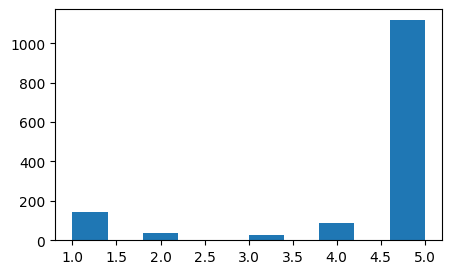

In [ ]:
fig, ax = plt.subplots(figsize =(5,3))
ax.hist(df["score"])


In [ ]:
def analyze_review(review):
    retries = 3
    sentiment = None

    while retries > 0:
        messages = [
            {"role": "system", "content": "You are an AI language model trained to analyze and detect the sentiment of product reviews."},
            {"role": "user", "content": f"Analyze the following product review and determine if the sentiment is: positive, negative or neutral. Return only a single word, either POSITIVE, NEGATIVE or NEUTRAL: {review}"}
        ]

        completion = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=messages,
            max_tokens=3,
            n=1,
            stop=None,
            temperature=0
        )

        response_text = completion.choices[0].message.content
        print(response_text)
        if response_text in ["POSITIVE", "NEGATIVE", "NEUTRAL"]:
            sentiment = response_text
            break
        else:
            retries -= 1
            time.sleep(1)
    else:
        sentiment = "neutral"

    retries = 3

    return sentiment

In [ ]:
sentiments = []

for review in tqdm(df["text"], desc="Processing reviews"):
    sentiment = analyze_review(review)
    sentiments.append(sentiment)

Processing reviews:   0%|          | 1/1417 [00:00<16:15,  1.45it/s]

NEUTRAL


Processing reviews:   0%|          | 2/1417 [00:01<13:44,  1.72it/s]

POSITIVE


Processing reviews:   0%|          | 3/1417 [00:01<12:52,  1.83it/s]

POSITIVE


Processing reviews:   0%|          | 4/1417 [00:02<12:38,  1.86it/s]

POSITIVE


Processing reviews:   0%|          | 5/1417 [00:02<12:14,  1.92it/s]

POSITIVE


Processing reviews:   0%|          | 6/1417 [00:03<12:27,  1.89it/s]

POSITIVE


Processing reviews:   0%|          | 7/1417 [00:03<12:04,  1.95it/s]

POSITIVE


Processing reviews:   1%|          | 8/1417 [00:04<12:44,  1.84it/s]

POSITIVE


Processing reviews:   1%|          | 9/1417 [00:04<12:17,  1.91it/s]

POSITIVE


Processing reviews:   1%|          | 10/1417 [00:05<12:12,  1.92it/s]

POSITIVE


Processing reviews:   1%|          | 11/1417 [00:05<11:52,  1.97it/s]

POSITIVE


Processing reviews:   1%|          | 12/1417 [00:06<14:40,  1.60it/s]

NEGATIVE


Processing reviews:   1%|          | 13/1417 [00:07<14:15,  1.64it/s]

POSITIVE


Processing reviews:   1%|          | 14/1417 [00:07<13:15,  1.76it/s]

POSITIVE


Processing reviews:   1%|          | 15/1417 [00:08<13:12,  1.77it/s]

POSITIVE


Processing reviews:   1%|          | 16/1417 [00:08<13:00,  1.79it/s]

POSITIVE


Processing reviews:   1%|          | 17/1417 [00:09<12:39,  1.84it/s]

POSITIVE


Processing reviews:   1%|▏         | 18/1417 [00:09<12:06,  1.93it/s]

POSITIVE


Processing reviews:   1%|▏         | 19/1417 [00:10<12:58,  1.79it/s]

POSITIVE


Processing reviews:   1%|▏         | 20/1417 [00:10<12:18,  1.89it/s]

POSITIVE


Processing reviews:   1%|▏         | 21/1417 [00:11<12:36,  1.85it/s]

POSITIVE


Processing reviews:   2%|▏         | 22/1417 [00:12<12:14,  1.90it/s]

POSITIVE


Processing reviews:   2%|▏         | 23/1417 [00:12<12:12,  1.90it/s]

POSITIVE


Processing reviews:   2%|▏         | 24/1417 [00:12<11:39,  1.99it/s]

POSITIVE


Processing reviews:   2%|▏         | 25/1417 [00:13<11:55,  1.95it/s]

POSITIVE


Processing reviews:   2%|▏         | 26/1417 [00:14<12:00,  1.93it/s]

POSITIVE


Processing reviews:   2%|▏         | 27/1417 [00:14<11:59,  1.93it/s]

POSITIVE


Processing reviews:   2%|▏         | 28/1417 [00:15<12:09,  1.90it/s]

POSITIVE


Processing reviews:   2%|▏         | 29/1417 [00:15<11:48,  1.96it/s]

NEUTRAL


Processing reviews:   2%|▏         | 30/1417 [00:16<12:15,  1.89it/s]

NEGATIVE


Processing reviews:   2%|▏         | 31/1417 [00:16<12:02,  1.92it/s]

POSITIVE


Processing reviews:   2%|▏         | 32/1417 [00:17<11:41,  1.98it/s]

POSITIVE


Processing reviews:   2%|▏         | 33/1417 [00:17<11:07,  2.07it/s]

POSITIVE


Processing reviews:   2%|▏         | 34/1417 [00:18<11:29,  2.01it/s]

NEGATIVE


Processing reviews:   2%|▏         | 35/1417 [00:18<11:27,  2.01it/s]

NEGATIVE


Processing reviews:   3%|▎         | 36/1417 [00:19<11:49,  1.95it/s]

POSITIVE


Processing reviews:   3%|▎         | 37/1417 [00:19<12:04,  1.90it/s]

POSITIVE


Processing reviews:   3%|▎         | 38/1417 [00:20<11:56,  1.92it/s]

NEGATIVE


Processing reviews:   3%|▎         | 39/1417 [00:20<11:48,  1.95it/s]

POSITIVE


Processing reviews:   3%|▎         | 40/1417 [00:21<11:48,  1.94it/s]

POSITIVE


Processing reviews:   3%|▎         | 41/1417 [00:21<11:56,  1.92it/s]

NEGATIVE


Processing reviews:   3%|▎         | 42/1417 [00:22<11:48,  1.94it/s]

POSITIVE


Processing reviews:   3%|▎         | 43/1417 [00:22<11:35,  1.97it/s]

POSITIVE


Processing reviews:   3%|▎         | 44/1417 [00:23<11:23,  2.01it/s]

NEGATIVE


Processing reviews:   3%|▎         | 45/1417 [00:23<11:12,  2.04it/s]

NEGATIVE


Processing reviews:   3%|▎         | 46/1417 [00:24<11:34,  1.97it/s]

POSITIVE


Processing reviews:   3%|▎         | 47/1417 [00:24<11:04,  2.06it/s]

POSITIVE


Processing reviews:   3%|▎         | 48/1417 [00:25<11:56,  1.91it/s]

POSITIVE


Processing reviews:   3%|▎         | 49/1417 [00:25<11:40,  1.95it/s]

POSITIVE


Processing reviews:   4%|▎         | 50/1417 [00:26<11:37,  1.96it/s]

POSITIVE


Processing reviews:   4%|▎         | 51/1417 [00:26<11:09,  2.04it/s]

POSITIVE


Processing reviews:   4%|▎         | 52/1417 [00:27<12:03,  1.89it/s]

POSITIVE


Processing reviews:   4%|▎         | 53/1417 [00:27<12:47,  1.78it/s]

POSITIVE


Processing reviews:   4%|▍         | 54/1417 [00:28<12:41,  1.79it/s]

POSITIVE


Processing reviews:   4%|▍         | 55/1417 [00:29<12:21,  1.84it/s]

POSITIVE


Processing reviews:   4%|▍         | 56/1417 [00:29<12:31,  1.81it/s]

POSITIVE


Processing reviews:   4%|▍         | 57/1417 [00:30<12:11,  1.86it/s]

POSITIVE


Processing reviews:   4%|▍         | 58/1417 [00:30<12:00,  1.89it/s]

NEUTRAL


Processing reviews:   4%|▍         | 59/1417 [00:31<12:01,  1.88it/s]

NEUTRAL


Processing reviews:   4%|▍         | 60/1417 [00:31<12:04,  1.87it/s]

POSITIVE


Processing reviews:   4%|▍         | 61/1417 [00:32<11:40,  1.94it/s]

POSITIVE


Processing reviews:   4%|▍         | 62/1417 [00:32<11:16,  2.00it/s]

POSITIVE


Processing reviews:   4%|▍         | 63/1417 [00:33<11:33,  1.95it/s]

POSITIVE


Processing reviews:   5%|▍         | 64/1417 [00:33<11:30,  1.96it/s]

POSITIVE


Processing reviews:   5%|▍         | 65/1417 [00:34<11:30,  1.96it/s]

POSITIVE


Processing reviews:   5%|▍         | 66/1417 [00:34<11:32,  1.95it/s]

NEGATIVE


Processing reviews:   5%|▍         | 67/1417 [00:35<11:27,  1.96it/s]

POSITIVE


Processing reviews:   5%|▍         | 68/1417 [00:35<11:17,  1.99it/s]

POSITIVE


Processing reviews:   5%|▍         | 69/1417 [00:36<11:01,  2.04it/s]

NEUTRAL


Processing reviews:   5%|▍         | 70/1417 [00:36<11:11,  2.01it/s]

POSITIVE


Processing reviews:   5%|▌         | 71/1417 [00:37<11:09,  2.01it/s]

POSITIVE


Processing reviews:   5%|▌         | 72/1417 [00:37<11:15,  1.99it/s]

NEGATIVE


Processing reviews:   5%|▌         | 73/1417 [00:38<11:11,  2.00it/s]

NEGATIVE


Processing reviews:   5%|▌         | 74/1417 [00:38<11:07,  2.01it/s]

NEGATIVE


Processing reviews:   5%|▌         | 75/1417 [00:39<10:53,  2.05it/s]

POSITIVE


Processing reviews:   5%|▌         | 76/1417 [00:39<10:59,  2.03it/s]

POSITIVE


Processing reviews:   5%|▌         | 77/1417 [00:40<11:06,  2.01it/s]

NEUTRAL


Processing reviews:   6%|▌         | 78/1417 [00:40<10:56,  2.04it/s]

NEGATIVE


Processing reviews:   6%|▌         | 79/1417 [00:41<10:54,  2.05it/s]

POSITIVE


Processing reviews:   6%|▌         | 80/1417 [00:41<10:51,  2.05it/s]

POSITIVE


Processing reviews:   6%|▌         | 81/1417 [00:42<10:49,  2.06it/s]

POSITIVE


Processing reviews:   6%|▌         | 82/1417 [00:42<10:53,  2.04it/s]

POSITIVE


Processing reviews:   6%|▌         | 83/1417 [00:43<10:39,  2.09it/s]

POSITIVE


Processing reviews:   6%|▌         | 84/1417 [00:43<10:26,  2.13it/s]

POSITIVE


Processing reviews:   6%|▌         | 85/1417 [00:43<10:20,  2.15it/s]

POSITIVE


Processing reviews:   6%|▌         | 86/1417 [00:44<10:27,  2.12it/s]

POSITIVE


Processing reviews:   6%|▌         | 87/1417 [00:44<10:35,  2.09it/s]

POSITIVE


Processing reviews:   6%|▌         | 88/1417 [00:45<10:43,  2.07it/s]

NEGATIVE


Processing reviews:   6%|▋         | 89/1417 [00:45<10:29,  2.11it/s]

POSITIVE


Processing reviews:   6%|▋         | 90/1417 [00:46<10:46,  2.05it/s]

POSITIVE


Processing reviews:   6%|▋         | 91/1417 [00:46<10:38,  2.08it/s]

POSITIVE


Processing reviews:   6%|▋         | 92/1417 [00:47<10:27,  2.11it/s]

NEGATIVE


Processing reviews:   7%|▋         | 93/1417 [00:47<10:26,  2.11it/s]

POSITIVE


Processing reviews:   7%|▋         | 94/1417 [00:48<10:20,  2.13it/s]

POSITIVE
I'm sorry
I'm sorry
I'm sorry


Processing reviews:   7%|▋         | 96/1417 [00:53<29:19,  1.33s/it]

POSITIVE


Processing reviews:   7%|▋         | 97/1417 [00:53<24:22,  1.11s/it]

POSITIVE


Processing reviews:   7%|▋         | 98/1417 [00:54<20:30,  1.07it/s]

POSITIVE


Processing reviews:   7%|▋         | 99/1417 [00:54<17:35,  1.25it/s]

NEGATIVE


Processing reviews:   7%|▋         | 100/1417 [00:55<15:58,  1.37it/s]

NEUTRAL


Processing reviews:   7%|▋         | 101/1417 [00:55<14:27,  1.52it/s]

POSITIVE


Processing reviews:   7%|▋         | 102/1417 [00:56<13:00,  1.69it/s]

POSITIVE


Processing reviews:   7%|▋         | 103/1417 [00:56<12:14,  1.79it/s]

POSITIVE


Processing reviews:   7%|▋         | 104/1417 [00:57<12:17,  1.78it/s]

POSITIVE


Processing reviews:   7%|▋         | 105/1417 [00:57<11:47,  1.85it/s]

POSITIVE


Processing reviews:   7%|▋         | 106/1417 [00:58<11:31,  1.90it/s]

NEUTRAL


Processing reviews:   8%|▊         | 107/1417 [00:58<11:40,  1.87it/s]

POSITIVE


Processing reviews:   8%|▊         | 108/1417 [00:59<11:16,  1.93it/s]

NEUTRAL


Processing reviews:   8%|▊         | 109/1417 [00:59<11:13,  1.94it/s]

POSITIVE


Processing reviews:   8%|▊         | 110/1417 [01:00<10:57,  1.99it/s]

NEUTRAL


Processing reviews:   8%|▊         | 111/1417 [01:00<10:43,  2.03it/s]

POSITIVE


Processing reviews:   8%|▊         | 112/1417 [01:01<10:48,  2.01it/s]

NEGATIVE


Processing reviews:   8%|▊         | 113/1417 [01:01<11:01,  1.97it/s]

POSITIVE


Processing reviews:   8%|▊         | 114/1417 [01:02<10:59,  1.98it/s]

POSITIVE


Processing reviews:   8%|▊         | 115/1417 [01:02<10:36,  2.05it/s]

NEGATIVE


Processing reviews:   8%|▊         | 116/1417 [01:03<10:35,  2.05it/s]

POSITIVE


Processing reviews:   8%|▊         | 117/1417 [01:03<10:31,  2.06it/s]

POSITIVE


Processing reviews:   8%|▊         | 118/1417 [01:04<10:32,  2.05it/s]

POSITIVE


Processing reviews:   8%|▊         | 119/1417 [01:04<10:38,  2.03it/s]

POSITIVE


Processing reviews:   8%|▊         | 120/1417 [01:05<12:57,  1.67it/s]

NEGATIVE


Processing reviews:   9%|▊         | 121/1417 [01:06<12:31,  1.73it/s]

POSITIVE


Processing reviews:   9%|▊         | 122/1417 [01:06<11:59,  1.80it/s]

POSITIVE


Processing reviews:   9%|▊         | 123/1417 [01:07<11:28,  1.88it/s]

POSITIVE


Processing reviews:   9%|▉         | 124/1417 [01:07<11:39,  1.85it/s]

POSITIVE


Processing reviews:   9%|▉         | 125/1417 [01:08<11:10,  1.93it/s]

POSITIVE


Processing reviews:   9%|▉         | 126/1417 [01:08<10:59,  1.96it/s]

POSITIVE


Processing reviews:   9%|▉         | 127/1417 [01:09<10:54,  1.97it/s]

POSITIVE


Processing reviews:   9%|▉         | 128/1417 [01:09<10:30,  2.05it/s]

NEGATIVE


Processing reviews:   9%|▉         | 129/1417 [01:10<10:32,  2.04it/s]

NEUTRAL


Processing reviews:   9%|▉         | 130/1417 [01:10<10:28,  2.05it/s]

POSITIVE


Processing reviews:   9%|▉         | 131/1417 [01:11<10:40,  2.01it/s]

NEGATIVE


Processing reviews:   9%|▉         | 132/1417 [01:11<10:27,  2.05it/s]

NEGATIVE


Processing reviews:   9%|▉         | 133/1417 [01:12<10:20,  2.07it/s]

NEGATIVE


Processing reviews:   9%|▉         | 134/1417 [01:12<10:23,  2.06it/s]

POSITIVE


Processing reviews:  10%|▉         | 135/1417 [01:13<10:12,  2.09it/s]

POSITIVE
I'm sorry
I'm sorry
I'm sorry


Processing reviews:  10%|▉         | 137/1417 [01:17<28:05,  1.32s/it]

POSITIVE


Processing reviews:  10%|▉         | 138/1417 [01:18<22:49,  1.07s/it]

POSITIVE


Processing reviews:  10%|▉         | 139/1417 [01:18<19:09,  1.11it/s]

POSITIVE


Processing reviews:  10%|▉         | 140/1417 [01:19<16:27,  1.29it/s]

POSITIVE


Processing reviews:  10%|▉         | 141/1417 [01:19<14:42,  1.45it/s]

POSITIVE


Processing reviews:  10%|█         | 142/1417 [01:20<13:27,  1.58it/s]

NEGATIVE


Processing reviews:  10%|█         | 143/1417 [01:20<12:24,  1.71it/s]

POSITIVE


Processing reviews:  10%|█         | 144/1417 [01:21<11:28,  1.85it/s]

POSITIVE


Processing reviews:  10%|█         | 145/1417 [01:21<10:57,  1.94it/s]

POSITIVE


Processing reviews:  10%|█         | 146/1417 [01:22<10:47,  1.96it/s]

POSITIVE


Processing reviews:  10%|█         | 147/1417 [01:22<10:43,  1.97it/s]

NEGATIVE


Processing reviews:  10%|█         | 148/1417 [01:23<10:43,  1.97it/s]

POSITIVE


Processing reviews:  11%|█         | 149/1417 [01:23<10:32,  2.00it/s]

NEGATIVE


Processing reviews:  11%|█         | 150/1417 [01:24<10:21,  2.04it/s]

POSITIVE


Processing reviews:  11%|█         | 151/1417 [01:24<10:21,  2.04it/s]

POSITIVE


Processing reviews:  11%|█         | 152/1417 [01:25<10:20,  2.04it/s]

NEUTRAL


Processing reviews:  11%|█         | 153/1417 [01:25<10:24,  2.03it/s]

POSITIVE


Processing reviews:  11%|█         | 154/1417 [01:26<10:06,  2.08it/s]

POSITIVE


Processing reviews:  11%|█         | 155/1417 [01:26<10:24,  2.02it/s]

NEGATIVE


Processing reviews:  11%|█         | 156/1417 [01:27<10:19,  2.04it/s]

POSITIVE


Processing reviews:  11%|█         | 157/1417 [01:27<10:27,  2.01it/s]

POSITIVE


Processing reviews:  11%|█         | 158/1417 [01:28<10:24,  2.02it/s]

NEUTRAL


Processing reviews:  11%|█         | 159/1417 [01:28<10:16,  2.04it/s]

NEUTRAL


Processing reviews:  11%|█▏        | 160/1417 [01:29<10:17,  2.03it/s]

POSITIVE


Processing reviews:  11%|█▏        | 161/1417 [01:29<10:31,  1.99it/s]

POSITIVE


Processing reviews:  11%|█▏        | 162/1417 [01:30<10:15,  2.04it/s]

POSITIVE


Processing reviews:  12%|█▏        | 163/1417 [01:30<10:12,  2.05it/s]

POSITIVE


Processing reviews:  12%|█▏        | 164/1417 [01:31<10:36,  1.97it/s]

NEUTRAL


Processing reviews:  12%|█▏        | 165/1417 [01:31<10:39,  1.96it/s]

POSITIVE


Processing reviews:  12%|█▏        | 166/1417 [01:32<10:35,  1.97it/s]

NEGATIVE


Processing reviews:  12%|█▏        | 167/1417 [01:32<10:41,  1.95it/s]

NEUTRAL


Processing reviews:  12%|█▏        | 168/1417 [01:33<10:49,  1.92it/s]

POSITIVE


Processing reviews:  12%|█▏        | 169/1417 [01:33<10:57,  1.90it/s]

POSITIVE


Processing reviews:  12%|█▏        | 170/1417 [01:34<10:41,  1.94it/s]

POSITIVE


Processing reviews:  12%|█▏        | 171/1417 [01:34<10:47,  1.93it/s]

NEGATIVE


Processing reviews:  12%|█▏        | 172/1417 [01:35<10:50,  1.92it/s]

POSITIVE


Processing reviews:  12%|█▏        | 173/1417 [01:35<10:40,  1.94it/s]

POSITIVE


Processing reviews:  12%|█▏        | 174/1417 [01:36<10:23,  1.99it/s]

NEGATIVE


Processing reviews:  12%|█▏        | 175/1417 [01:36<10:19,  2.01it/s]

POSITIVE


Processing reviews:  12%|█▏        | 176/1417 [01:37<10:24,  1.99it/s]

POSITIVE


Processing reviews:  12%|█▏        | 177/1417 [01:37<10:39,  1.94it/s]

POSITIVE


Processing reviews:  13%|█▎        | 178/1417 [01:38<10:34,  1.95it/s]

POSITIVE


Processing reviews:  13%|█▎        | 179/1417 [01:38<10:38,  1.94it/s]

POSITIVE


Processing reviews:  13%|█▎        | 180/1417 [01:39<10:34,  1.95it/s]

POSITIVE


Processing reviews:  13%|█▎        | 181/1417 [01:39<10:21,  1.99it/s]

POSITIVE


Processing reviews:  13%|█▎        | 182/1417 [01:40<10:36,  1.94it/s]

NEGATIVE


Processing reviews:  13%|█▎        | 183/1417 [01:41<11:03,  1.86it/s]

NEGATIVE


Processing reviews:  13%|█▎        | 184/1417 [01:41<10:54,  1.88it/s]

NEGATIVE


Processing reviews:  13%|█▎        | 185/1417 [01:42<10:43,  1.91it/s]

POSITIVE


Processing reviews:  13%|█▎        | 186/1417 [01:42<10:43,  1.91it/s]

POSITIVE


Processing reviews:  13%|█▎        | 187/1417 [01:43<10:27,  1.96it/s]

POSITIVE


Processing reviews:  13%|█▎        | 188/1417 [01:43<10:16,  1.99it/s]

POSITIVE


Processing reviews:  13%|█▎        | 189/1417 [01:44<10:07,  2.02it/s]

POSITIVE


Processing reviews:  13%|█▎        | 190/1417 [01:44<10:06,  2.02it/s]

NEUTRAL


Processing reviews:  13%|█▎        | 191/1417 [01:45<09:59,  2.04it/s]

POSITIVE


Processing reviews:  14%|█▎        | 192/1417 [01:45<10:10,  2.01it/s]

NEUTRAL


Processing reviews:  14%|█▎        | 193/1417 [01:46<10:04,  2.02it/s]

NEUTRAL


Processing reviews:  14%|█▎        | 194/1417 [01:46<09:57,  2.05it/s]

POSITIVE


Processing reviews:  14%|█▍        | 195/1417 [01:47<10:09,  2.00it/s]

POSITIVE


Processing reviews:  14%|█▍        | 196/1417 [01:47<09:47,  2.08it/s]

NEGATIVE


Processing reviews:  14%|█▍        | 197/1417 [01:47<09:44,  2.09it/s]

POSITIVE


Processing reviews:  14%|█▍        | 198/1417 [01:48<09:49,  2.07it/s]

POSITIVE


Processing reviews:  14%|█▍        | 199/1417 [01:48<09:52,  2.06it/s]

NEGATIVE


Processing reviews:  14%|█▍        | 200/1417 [01:49<10:16,  1.97it/s]

POSITIVE


Processing reviews:  14%|█▍        | 201/1417 [01:49<10:13,  1.98it/s]

POSITIVE


Processing reviews:  14%|█▍        | 202/1417 [01:50<09:47,  2.07it/s]

POSITIVE


Processing reviews:  14%|█▍        | 203/1417 [01:50<09:47,  2.07it/s]

POSITIVE


Processing reviews:  14%|█▍        | 204/1417 [01:51<09:57,  2.03it/s]

POSITIVE


Processing reviews:  14%|█▍        | 205/1417 [01:51<10:04,  2.00it/s]

POSITIVE


Processing reviews:  15%|█▍        | 206/1417 [01:52<10:42,  1.89it/s]

POSITIVE


Processing reviews:  15%|█▍        | 207/1417 [01:53<10:31,  1.91it/s]

POSITIVE


Processing reviews:  15%|█▍        | 208/1417 [01:53<10:47,  1.87it/s]

POSITIVE


Processing reviews:  15%|█▍        | 209/1417 [01:54<10:27,  1.93it/s]

NEGATIVE


Processing reviews:  15%|█▍        | 210/1417 [01:54<10:41,  1.88it/s]

POSITIVE


Processing reviews:  15%|█▍        | 211/1417 [01:55<10:35,  1.90it/s]

POSITIVE


Processing reviews:  15%|█▍        | 212/1417 [01:55<10:16,  1.95it/s]

POSITIVE


Processing reviews:  15%|█▌        | 213/1417 [01:56<09:59,  2.01it/s]

POSITIVE


Processing reviews:  15%|█▌        | 214/1417 [01:56<09:51,  2.03it/s]

POSITIVE


Processing reviews:  15%|█▌        | 215/1417 [01:57<09:56,  2.01it/s]

NEGATIVE


Processing reviews:  15%|█▌        | 216/1417 [01:57<09:45,  2.05it/s]

POSITIVE


Processing reviews:  15%|█▌        | 217/1417 [01:58<09:41,  2.06it/s]

POSITIVE


Processing reviews:  15%|█▌        | 218/1417 [01:58<09:28,  2.11it/s]

POSITIVE


Processing reviews:  15%|█▌        | 219/1417 [01:59<09:48,  2.04it/s]

NEGATIVE


Processing reviews:  16%|█▌        | 220/1417 [01:59<09:56,  2.01it/s]

POSITIVE


Processing reviews:  16%|█▌        | 221/1417 [01:59<09:38,  2.07it/s]

POSITIVE


Processing reviews:  16%|█▌        | 222/1417 [02:00<10:08,  1.96it/s]

POSITIVE


Processing reviews:  16%|█▌        | 223/1417 [02:01<10:29,  1.90it/s]

POSITIVE


Processing reviews:  16%|█▌        | 224/1417 [02:01<10:27,  1.90it/s]

POSITIVE


Processing reviews:  16%|█▌        | 225/1417 [02:02<10:27,  1.90it/s]

POSITIVE


Processing reviews:  16%|█▌        | 226/1417 [02:02<10:19,  1.92it/s]

NEUTRAL


Processing reviews:  16%|█▌        | 227/1417 [02:03<10:05,  1.96it/s]

NEUTRAL


Processing reviews:  16%|█▌        | 228/1417 [02:03<10:09,  1.95it/s]

POSITIVE


Processing reviews:  16%|█▌        | 229/1417 [02:04<09:56,  1.99it/s]

POSITIVE


Processing reviews:  16%|█▌        | 230/1417 [02:04<09:39,  2.05it/s]

POSITIVE


Processing reviews:  16%|█▋        | 231/1417 [02:05<10:30,  1.88it/s]

POSITIVE


Processing reviews:  16%|█▋        | 232/1417 [02:05<10:06,  1.95it/s]

NEGATIVE


Processing reviews:  16%|█▋        | 233/1417 [02:06<10:04,  1.96it/s]

POSITIVE


Processing reviews:  17%|█▋        | 234/1417 [02:06<10:04,  1.96it/s]

POSITIVE


Processing reviews:  17%|█▋        | 235/1417 [02:07<10:00,  1.97it/s]

POSITIVE


Processing reviews:  17%|█▋        | 236/1417 [02:07<09:43,  2.02it/s]

POSITIVE


Processing reviews:  17%|█▋        | 237/1417 [02:08<09:30,  2.07it/s]

POSITIVE


Processing reviews:  17%|█▋        | 238/1417 [02:08<09:15,  2.12it/s]

NEUTRAL


Processing reviews:  17%|█▋        | 239/1417 [02:09<09:19,  2.11it/s]

NEGATIVE


Processing reviews:  17%|█▋        | 240/1417 [02:09<09:19,  2.10it/s]

POSITIVE


Processing reviews:  17%|█▋        | 241/1417 [02:10<09:25,  2.08it/s]

POSITIVE


Processing reviews:  17%|█▋        | 242/1417 [02:10<09:55,  1.97it/s]

POSITIVE


Processing reviews:  17%|█▋        | 243/1417 [02:11<09:46,  2.00it/s]

POSITIVE


Processing reviews:  17%|█▋        | 244/1417 [02:11<09:40,  2.02it/s]

POSITIVE


Processing reviews:  17%|█▋        | 245/1417 [02:12<09:31,  2.05it/s]

POSITIVE


Processing reviews:  17%|█▋        | 246/1417 [02:12<09:19,  2.09it/s]

POSITIVE


Processing reviews:  17%|█▋        | 247/1417 [02:13<09:29,  2.05it/s]

POSITIVE


Processing reviews:  18%|█▊        | 248/1417 [02:13<09:20,  2.09it/s]

POSITIVE


Processing reviews:  18%|█▊        | 249/1417 [02:13<09:23,  2.07it/s]

NEGATIVE


Processing reviews:  18%|█▊        | 250/1417 [02:14<09:29,  2.05it/s]

POSITIVE


Processing reviews:  18%|█▊        | 251/1417 [02:14<09:40,  2.01it/s]

POSITIVE


Processing reviews:  18%|█▊        | 252/1417 [02:15<09:38,  2.02it/s]

POSITIVE


Processing reviews:  18%|█▊        | 253/1417 [02:15<09:43,  2.00it/s]

POSITIVE


Processing reviews:  18%|█▊        | 254/1417 [02:16<09:48,  1.98it/s]

POSITIVE


Processing reviews:  18%|█▊        | 255/1417 [02:16<09:35,  2.02it/s]

POSITIVE


Processing reviews:  18%|█▊        | 256/1417 [02:17<09:38,  2.01it/s]

POSITIVE


Processing reviews:  18%|█▊        | 257/1417 [02:17<09:39,  2.00it/s]

POSITIVE


Processing reviews:  18%|█▊        | 258/1417 [02:18<09:47,  1.97it/s]

POSITIVE


Processing reviews:  18%|█▊        | 259/1417 [02:18<09:34,  2.01it/s]

POSITIVE


Processing reviews:  18%|█▊        | 260/1417 [02:19<09:34,  2.01it/s]

POSITIVE


Processing reviews:  18%|█▊        | 261/1417 [02:20<09:53,  1.95it/s]

POSITIVE


Processing reviews:  18%|█▊        | 262/1417 [02:20<09:25,  2.04it/s]

POSITIVE


Processing reviews:  19%|█▊        | 263/1417 [02:20<09:13,  2.09it/s]

NEUTRAL


Processing reviews:  19%|█▊        | 264/1417 [02:21<09:17,  2.07it/s]

POSITIVE


Processing reviews:  19%|█▊        | 265/1417 [02:21<09:07,  2.10it/s]

POSITIVE


Processing reviews:  19%|█▉        | 266/1417 [02:22<09:19,  2.06it/s]

POSITIVE


Processing reviews:  19%|█▉        | 267/1417 [02:22<09:28,  2.02it/s]

POSITIVE


Processing reviews:  19%|█▉        | 268/1417 [02:23<09:32,  2.01it/s]

POSITIVE


Processing reviews:  19%|█▉        | 269/1417 [02:23<09:28,  2.02it/s]

NEGATIVE


Processing reviews:  19%|█▉        | 270/1417 [02:24<09:14,  2.07it/s]

POSITIVE


Processing reviews:  19%|█▉        | 271/1417 [02:24<09:09,  2.09it/s]

NEGATIVE


Processing reviews:  19%|█▉        | 272/1417 [02:25<09:20,  2.04it/s]

POSITIVE


Processing reviews:  19%|█▉        | 273/1417 [02:25<09:04,  2.10it/s]

POSITIVE


Processing reviews:  19%|█▉        | 274/1417 [02:26<09:06,  2.09it/s]

POSITIVE


Processing reviews:  19%|█▉        | 275/1417 [02:26<08:54,  2.14it/s]

POSITIVE


Processing reviews:  19%|█▉        | 276/1417 [02:27<09:04,  2.10it/s]

NEUTRAL


Processing reviews:  20%|█▉        | 277/1417 [02:27<09:07,  2.08it/s]

POSITIVE


Processing reviews:  20%|█▉        | 278/1417 [02:28<09:27,  2.01it/s]

POSITIVE


Processing reviews:  20%|█▉        | 279/1417 [02:28<09:56,  1.91it/s]

POSITIVE


Processing reviews:  20%|█▉        | 280/1417 [02:29<09:31,  1.99it/s]

POSITIVE


Processing reviews:  20%|█▉        | 281/1417 [02:29<09:26,  2.01it/s]

POSITIVE


Processing reviews:  20%|█▉        | 282/1417 [02:30<09:26,  2.00it/s]

NEUTRAL


Processing reviews:  20%|█▉        | 283/1417 [02:30<09:22,  2.02it/s]

POSITIVE


Processing reviews:  20%|██        | 284/1417 [02:31<09:23,  2.01it/s]

POSITIVE


Processing reviews:  20%|██        | 285/1417 [02:31<09:26,  2.00it/s]

POSITIVE


Processing reviews:  20%|██        | 286/1417 [02:32<09:19,  2.02it/s]

NEGATIVE


Processing reviews:  20%|██        | 287/1417 [02:32<09:09,  2.06it/s]

POSITIVE


Processing reviews:  20%|██        | 288/1417 [02:33<09:15,  2.03it/s]

POSITIVE


Processing reviews:  20%|██        | 289/1417 [02:33<09:11,  2.05it/s]

POSITIVE


Processing reviews:  20%|██        | 290/1417 [02:34<09:08,  2.05it/s]

NEGATIVE


Processing reviews:  21%|██        | 291/1417 [02:34<08:59,  2.09it/s]

NEGATIVE


Processing reviews:  21%|██        | 292/1417 [02:35<08:54,  2.11it/s]

POSITIVE


Processing reviews:  21%|██        | 293/1417 [02:35<09:00,  2.08it/s]

POSITIVE


Processing reviews:  21%|██        | 294/1417 [02:36<09:04,  2.06it/s]

POSITIVE


Processing reviews:  21%|██        | 295/1417 [02:36<08:48,  2.12it/s]

NEGATIVE


Processing reviews:  21%|██        | 296/1417 [02:37<08:51,  2.11it/s]

NEGATIVE


Processing reviews:  21%|██        | 297/1417 [02:37<08:46,  2.13it/s]

POSITIVE


Processing reviews:  21%|██        | 298/1417 [02:37<08:43,  2.14it/s]

POSITIVE


Processing reviews:  21%|██        | 299/1417 [02:38<08:53,  2.09it/s]

POSITIVE


Processing reviews:  21%|██        | 300/1417 [02:38<08:48,  2.11it/s]

POSITIVE


Processing reviews:  21%|██        | 301/1417 [02:39<08:41,  2.14it/s]

NEUTRAL


Processing reviews:  21%|██▏       | 302/1417 [02:39<08:39,  2.15it/s]

POSITIVE


Processing reviews:  21%|██▏       | 303/1417 [02:40<08:53,  2.09it/s]

POSITIVE


Processing reviews:  21%|██▏       | 304/1417 [02:40<08:44,  2.12it/s]

POSITIVE


Processing reviews:  22%|██▏       | 305/1417 [02:41<08:43,  2.12it/s]

POSITIVE


Processing reviews:  22%|██▏       | 306/1417 [02:41<08:42,  2.12it/s]

POSITIVE


Processing reviews:  22%|██▏       | 307/1417 [02:42<08:42,  2.13it/s]

POSITIVE


Processing reviews:  22%|██▏       | 308/1417 [02:42<08:52,  2.08it/s]

POSITIVE


Processing reviews:  22%|██▏       | 309/1417 [02:43<08:56,  2.07it/s]

POSITIVE


Processing reviews:  22%|██▏       | 310/1417 [02:43<09:11,  2.01it/s]

POSITIVE


Processing reviews:  22%|██▏       | 311/1417 [02:44<09:01,  2.04it/s]

POSITIVE


Processing reviews:  22%|██▏       | 312/1417 [02:44<09:03,  2.03it/s]

NEGATIVE


Processing reviews:  22%|██▏       | 313/1417 [02:45<09:01,  2.04it/s]

POSITIVE


Processing reviews:  22%|██▏       | 314/1417 [02:45<09:03,  2.03it/s]

POSITIVE


Processing reviews:  22%|██▏       | 315/1417 [02:46<08:50,  2.08it/s]

NEUTRAL


Processing reviews:  22%|██▏       | 316/1417 [02:46<09:15,  1.98it/s]

POSITIVE


Processing reviews:  22%|██▏       | 317/1417 [02:47<09:12,  1.99it/s]

POSITIVE


Processing reviews:  22%|██▏       | 318/1417 [02:47<09:08,  2.00it/s]

POSITIVE


Processing reviews:  23%|██▎       | 319/1417 [02:48<09:02,  2.02it/s]

POSITIVE


Processing reviews:  23%|██▎       | 320/1417 [02:48<09:05,  2.01it/s]

POSITIVE


Processing reviews:  23%|██▎       | 321/1417 [02:49<09:17,  1.97it/s]

POSITIVE


Processing reviews:  23%|██▎       | 322/1417 [02:49<09:07,  2.00it/s]

POSITIVE


Processing reviews:  23%|██▎       | 323/1417 [02:50<09:07,  2.00it/s]

NEGATIVE


Processing reviews:  23%|██▎       | 324/1417 [02:50<08:56,  2.04it/s]

POSITIVE


Processing reviews:  23%|██▎       | 325/1417 [02:51<09:02,  2.01it/s]

POSITIVE


Processing reviews:  23%|██▎       | 326/1417 [02:51<08:56,  2.04it/s]

POSITIVE


Processing reviews:  23%|██▎       | 327/1417 [02:52<08:49,  2.06it/s]

POSITIVE


Processing reviews:  23%|██▎       | 328/1417 [02:52<08:45,  2.07it/s]

POSITIVE


Processing reviews:  23%|██▎       | 329/1417 [02:53<08:45,  2.07it/s]

NEGATIVE


Processing reviews:  23%|██▎       | 330/1417 [02:53<08:59,  2.01it/s]

POSITIVE


Processing reviews:  23%|██▎       | 331/1417 [02:54<08:54,  2.03it/s]

NEGATIVE


Processing reviews:  23%|██▎       | 332/1417 [02:54<09:06,  1.98it/s]

NEGATIVE


Processing reviews:  24%|██▎       | 333/1417 [02:55<09:00,  2.01it/s]

NEGATIVE


Processing reviews:  24%|██▎       | 334/1417 [02:55<08:51,  2.04it/s]

NEGATIVE


Processing reviews:  24%|██▎       | 335/1417 [02:56<08:39,  2.08it/s]

POSITIVE


Processing reviews:  24%|██▎       | 336/1417 [02:56<08:50,  2.04it/s]

NEUTRAL


Processing reviews:  24%|██▍       | 337/1417 [02:57<08:54,  2.02it/s]

NEUTRAL


Processing reviews:  24%|██▍       | 338/1417 [02:57<08:48,  2.04it/s]

POSITIVE


Processing reviews:  24%|██▍       | 339/1417 [02:58<08:54,  2.02it/s]

NEGATIVE


Processing reviews:  24%|██▍       | 340/1417 [02:58<09:08,  1.96it/s]

POSITIVE


Processing reviews:  24%|██▍       | 341/1417 [02:59<08:49,  2.03it/s]

POSITIVE


Processing reviews:  24%|██▍       | 342/1417 [02:59<08:46,  2.04it/s]

POSITIVE


Processing reviews:  24%|██▍       | 343/1417 [02:59<08:45,  2.04it/s]

POSITIVE


Processing reviews:  24%|██▍       | 344/1417 [03:00<08:36,  2.08it/s]

POSITIVE


Processing reviews:  24%|██▍       | 345/1417 [03:00<08:37,  2.07it/s]

POSITIVE


Processing reviews:  24%|██▍       | 346/1417 [03:01<08:39,  2.06it/s]

POSITIVE


Processing reviews:  24%|██▍       | 347/1417 [03:01<08:33,  2.08it/s]

NEUTRAL


Processing reviews:  25%|██▍       | 348/1417 [03:02<08:26,  2.11it/s]

POSITIVE


Processing reviews:  25%|██▍       | 349/1417 [03:02<08:42,  2.04it/s]

NEUTRAL


Processing reviews:  25%|██▍       | 350/1417 [03:03<08:43,  2.04it/s]

POSITIVE


Processing reviews:  25%|██▍       | 351/1417 [03:03<08:35,  2.07it/s]

POSITIVE


Processing reviews:  25%|██▍       | 352/1417 [03:04<08:43,  2.04it/s]

POSITIVE


Processing reviews:  25%|██▍       | 353/1417 [03:04<08:33,  2.07it/s]

POSITIVE


Processing reviews:  25%|██▍       | 354/1417 [03:05<08:41,  2.04it/s]

POSITIVE


Processing reviews:  25%|██▌       | 355/1417 [03:05<08:38,  2.05it/s]

NEUTRAL


Processing reviews:  25%|██▌       | 356/1417 [03:06<08:38,  2.05it/s]

POSITIVE


Processing reviews:  25%|██▌       | 357/1417 [03:06<08:36,  2.05it/s]

POSITIVE


Processing reviews:  25%|██▌       | 358/1417 [03:07<08:29,  2.08it/s]

POSITIVE


Processing reviews:  25%|██▌       | 359/1417 [03:07<08:50,  1.99it/s]

POSITIVE


Processing reviews:  25%|██▌       | 360/1417 [03:08<08:42,  2.02it/s]

POSITIVE


Processing reviews:  25%|██▌       | 361/1417 [03:08<08:36,  2.04it/s]

POSITIVE


Processing reviews:  26%|██▌       | 362/1417 [03:09<08:33,  2.06it/s]

POSITIVE


Processing reviews:  26%|██▌       | 363/1417 [03:09<08:32,  2.06it/s]

POSITIVE


Processing reviews:  26%|██▌       | 364/1417 [03:10<08:24,  2.09it/s]

POSITIVE


Processing reviews:  26%|██▌       | 365/1417 [03:10<08:31,  2.06it/s]

POSITIVE


Processing reviews:  26%|██▌       | 366/1417 [03:11<08:22,  2.09it/s]

POSITIVE


Processing reviews:  26%|██▌       | 367/1417 [03:11<08:35,  2.04it/s]

POSITIVE


Processing reviews:  26%|██▌       | 368/1417 [03:12<08:50,  1.98it/s]

POSITIVE


Processing reviews:  26%|██▌       | 369/1417 [03:12<08:42,  2.00it/s]

POSITIVE


Processing reviews:  26%|██▌       | 370/1417 [03:13<08:46,  1.99it/s]

NEUTRAL


Processing reviews:  26%|██▌       | 371/1417 [03:13<08:52,  1.97it/s]

POSITIVE


Processing reviews:  26%|██▋       | 372/1417 [03:14<08:56,  1.95it/s]

POSITIVE


Processing reviews:  26%|██▋       | 373/1417 [03:14<08:52,  1.96it/s]

POSITIVE


Processing reviews:  26%|██▋       | 374/1417 [03:15<09:10,  1.90it/s]

POSITIVE


Processing reviews:  26%|██▋       | 375/1417 [03:15<09:05,  1.91it/s]

POSITIVE


Processing reviews:  27%|██▋       | 376/1417 [03:16<08:52,  1.96it/s]

POSITIVE


Processing reviews:  27%|██▋       | 377/1417 [03:16<08:38,  2.00it/s]

POSITIVE


Processing reviews:  27%|██▋       | 378/1417 [03:17<08:29,  2.04it/s]

POSITIVE


Processing reviews:  27%|██▋       | 379/1417 [03:17<08:44,  1.98it/s]

POSITIVE


Processing reviews:  27%|██▋       | 380/1417 [03:18<08:42,  1.98it/s]

POSITIVE


Processing reviews:  27%|██▋       | 381/1417 [03:18<08:32,  2.02it/s]

NEGATIVE


Processing reviews:  27%|██▋       | 382/1417 [03:19<08:35,  2.01it/s]

NEGATIVE


Processing reviews:  27%|██▋       | 383/1417 [03:19<08:22,  2.06it/s]

NEUTRAL


Processing reviews:  27%|██▋       | 384/1417 [03:20<08:05,  2.13it/s]

POSITIVE


Processing reviews:  27%|██▋       | 385/1417 [03:20<08:01,  2.14it/s]

POSITIVE


Processing reviews:  27%|██▋       | 386/1417 [03:21<08:12,  2.09it/s]

NEGATIVE


Processing reviews:  27%|██▋       | 387/1417 [03:21<08:23,  2.04it/s]

POSITIVE


Processing reviews:  27%|██▋       | 388/1417 [03:22<08:20,  2.05it/s]

POSITIVE


Processing reviews:  27%|██▋       | 389/1417 [03:22<08:13,  2.08it/s]

NEGATIVE


Processing reviews:  28%|██▊       | 390/1417 [03:23<08:05,  2.12it/s]

NEGATIVE


Processing reviews:  28%|██▊       | 391/1417 [03:23<08:16,  2.07it/s]

POSITIVE


Processing reviews:  28%|██▊       | 392/1417 [03:24<08:09,  2.09it/s]

POSITIVE


Processing reviews:  28%|██▊       | 393/1417 [03:24<08:08,  2.09it/s]

NEGATIVE


Processing reviews:  28%|██▊       | 394/1417 [03:24<08:14,  2.07it/s]

POSITIVE


Processing reviews:  28%|██▊       | 395/1417 [03:25<08:31,  2.00it/s]

POSITIVE


Processing reviews:  28%|██▊       | 396/1417 [03:26<08:36,  1.98it/s]

POSITIVE


Processing reviews:  28%|██▊       | 397/1417 [03:26<08:32,  1.99it/s]

NEGATIVE


Processing reviews:  28%|██▊       | 398/1417 [03:27<08:33,  1.99it/s]

POSITIVE


Processing reviews:  28%|██▊       | 399/1417 [03:27<08:28,  2.00it/s]

NEGATIVE


Processing reviews:  28%|██▊       | 400/1417 [03:28<08:33,  1.98it/s]

POSITIVE


Processing reviews:  28%|██▊       | 401/1417 [03:28<08:23,  2.02it/s]

POSITIVE


Processing reviews:  28%|██▊       | 402/1417 [03:28<08:16,  2.04it/s]

POSITIVE


Processing reviews:  28%|██▊       | 403/1417 [03:29<08:09,  2.07it/s]

NEUTRAL


Processing reviews:  29%|██▊       | 404/1417 [03:29<08:03,  2.10it/s]

POSITIVE


Processing reviews:  29%|██▊       | 405/1417 [03:30<07:54,  2.13it/s]

NEGATIVE


Processing reviews:  29%|██▊       | 406/1417 [03:30<07:47,  2.16it/s]

NEUTRAL


Processing reviews:  29%|██▊       | 407/1417 [03:31<07:54,  2.13it/s]

NEGATIVE


Processing reviews:  29%|██▉       | 408/1417 [03:31<08:17,  2.03it/s]

POSITIVE


Processing reviews:  29%|██▉       | 409/1417 [03:32<08:15,  2.03it/s]

POSITIVE


Processing reviews:  29%|██▉       | 410/1417 [03:32<08:22,  2.01it/s]

POSITIVE


Processing reviews:  29%|██▉       | 411/1417 [03:33<08:25,  1.99it/s]

NEUTRAL


Processing reviews:  29%|██▉       | 412/1417 [03:33<08:22,  2.00it/s]

POSITIVE


Processing reviews:  29%|██▉       | 413/1417 [03:34<08:31,  1.96it/s]

POSITIVE


Processing reviews:  29%|██▉       | 414/1417 [03:34<08:41,  1.92it/s]

POSITIVE


Processing reviews:  29%|██▉       | 415/1417 [03:35<08:47,  1.90it/s]

POSITIVE


Processing reviews:  29%|██▉       | 416/1417 [03:35<08:36,  1.94it/s]

POSITIVE


Processing reviews:  29%|██▉       | 417/1417 [03:36<08:19,  2.00it/s]

POSITIVE


Processing reviews:  29%|██▉       | 418/1417 [03:36<08:17,  2.01it/s]

POSITIVE


Processing reviews:  30%|██▉       | 419/1417 [03:37<08:15,  2.01it/s]

POSITIVE


Processing reviews:  30%|██▉       | 420/1417 [03:37<08:16,  2.01it/s]

NEUTRAL


Processing reviews:  30%|██▉       | 421/1417 [03:38<08:14,  2.02it/s]

POSITIVE


Processing reviews:  30%|██▉       | 422/1417 [03:38<08:19,  1.99it/s]

POSITIVE


Processing reviews:  30%|██▉       | 423/1417 [03:39<08:25,  1.97it/s]

POSITIVE


Processing reviews:  30%|██▉       | 424/1417 [03:40<08:56,  1.85it/s]

POSITIVE


Processing reviews:  30%|██▉       | 425/1417 [03:40<08:30,  1.94it/s]

POSITIVE


Processing reviews:  30%|███       | 426/1417 [03:40<08:15,  2.00it/s]

POSITIVE


Processing reviews:  30%|███       | 427/1417 [03:41<08:11,  2.01it/s]

POSITIVE


Processing reviews:  30%|███       | 428/1417 [03:41<08:05,  2.04it/s]

POSITIVE


Processing reviews:  30%|███       | 429/1417 [03:42<08:25,  1.96it/s]

POSITIVE


Processing reviews:  30%|███       | 430/1417 [03:43<08:19,  1.98it/s]

NEGATIVE


Processing reviews:  30%|███       | 431/1417 [03:43<08:18,  1.98it/s]

POSITIVE


Processing reviews:  30%|███       | 432/1417 [03:44<08:20,  1.97it/s]

POSITIVE


Processing reviews:  31%|███       | 433/1417 [03:44<08:12,  2.00it/s]

NEGATIVE


Processing reviews:  31%|███       | 434/1417 [03:44<08:03,  2.03it/s]

POSITIVE


Processing reviews:  31%|███       | 435/1417 [03:45<07:59,  2.05it/s]

POSITIVE


Processing reviews:  31%|███       | 436/1417 [03:45<07:55,  2.06it/s]

POSITIVE


Processing reviews:  31%|███       | 437/1417 [03:46<08:02,  2.03it/s]

NEUTRAL


Processing reviews:  31%|███       | 438/1417 [03:46<08:15,  1.98it/s]

NEGATIVE


Processing reviews:  31%|███       | 439/1417 [03:47<07:53,  2.06it/s]

POSITIVE


Processing reviews:  31%|███       | 440/1417 [03:47<07:42,  2.11it/s]

NEGATIVE


Processing reviews:  31%|███       | 441/1417 [03:48<07:42,  2.11it/s]

POSITIVE


Processing reviews:  31%|███       | 442/1417 [03:48<07:48,  2.08it/s]

NEUTRAL


Processing reviews:  31%|███▏      | 443/1417 [03:49<07:50,  2.07it/s]

POSITIVE


Processing reviews:  31%|███▏      | 444/1417 [03:49<07:55,  2.05it/s]

POSITIVE


Processing reviews:  31%|███▏      | 445/1417 [03:50<08:02,  2.02it/s]

POSITIVE


Processing reviews:  31%|███▏      | 446/1417 [03:50<07:55,  2.04it/s]

NEGATIVE


Processing reviews:  32%|███▏      | 447/1417 [03:51<07:57,  2.03it/s]

NEUTRAL


Processing reviews:  32%|███▏      | 448/1417 [03:51<08:04,  2.00it/s]

POSITIVE


Processing reviews:  32%|███▏      | 449/1417 [03:52<07:59,  2.02it/s]

POSITIVE


Processing reviews:  32%|███▏      | 450/1417 [03:52<07:48,  2.06it/s]

NEUTRAL


Processing reviews:  32%|███▏      | 451/1417 [03:53<07:46,  2.07it/s]

POSITIVE


Processing reviews:  32%|███▏      | 452/1417 [03:53<07:42,  2.09it/s]

NEGATIVE


Processing reviews:  32%|███▏      | 453/1417 [03:54<07:45,  2.07it/s]

POSITIVE


Processing reviews:  32%|███▏      | 454/1417 [03:54<07:37,  2.10it/s]

POSITIVE


Processing reviews:  32%|███▏      | 455/1417 [03:55<07:55,  2.02it/s]

NEGATIVE


Processing reviews:  32%|███▏      | 456/1417 [03:55<07:52,  2.03it/s]

POSITIVE


Processing reviews:  32%|███▏      | 457/1417 [03:56<07:58,  2.00it/s]

POSITIVE


Processing reviews:  32%|███▏      | 458/1417 [03:56<07:48,  2.05it/s]

POSITIVE


Processing reviews:  32%|███▏      | 459/1417 [03:57<08:00,  1.99it/s]

POSITIVE


Processing reviews:  32%|███▏      | 460/1417 [03:57<07:50,  2.04it/s]

POSITIVE


Processing reviews:  33%|███▎      | 461/1417 [03:58<07:42,  2.07it/s]

POSITIVE


Processing reviews:  33%|███▎      | 462/1417 [03:58<07:39,  2.08it/s]

NEGATIVE
I'm sorry
I'm sorry
I'm sorry


Processing reviews:  33%|███▎      | 464/1417 [04:03<20:36,  1.30s/it]

POSITIVE


Processing reviews:  33%|███▎      | 465/1417 [04:03<16:46,  1.06s/it]

POSITIVE


Processing reviews:  33%|███▎      | 466/1417 [04:04<13:56,  1.14it/s]

NEUTRAL


Processing reviews:  33%|███▎      | 467/1417 [04:04<12:13,  1.30it/s]

NEGATIVE


Processing reviews:  33%|███▎      | 468/1417 [04:05<10:49,  1.46it/s]

NEGATIVE
I'm sorry
I'm sorry
I'm sorry


Processing reviews:  33%|███▎      | 470/1417 [04:10<22:36,  1.43s/it]

POSITIVE


Processing reviews:  33%|███▎      | 471/1417 [04:10<18:10,  1.15s/it]

NEUTRAL


Processing reviews:  33%|███▎      | 472/1417 [04:11<14:59,  1.05it/s]

POSITIVE


Processing reviews:  33%|███▎      | 473/1417 [04:11<12:45,  1.23it/s]

POSITIVE


Processing reviews:  33%|███▎      | 474/1417 [04:12<11:18,  1.39it/s]

POSITIVE


Processing reviews:  34%|███▎      | 475/1417 [04:12<10:09,  1.55it/s]

POSITIVE


Processing reviews:  34%|███▎      | 476/1417 [04:13<09:17,  1.69it/s]

POSITIVE


Processing reviews:  34%|███▎      | 477/1417 [04:13<09:11,  1.71it/s]

POSITIVE


Processing reviews:  34%|███▎      | 478/1417 [04:14<08:53,  1.76it/s]

POSITIVE


Processing reviews:  34%|███▍      | 479/1417 [04:14<08:31,  1.83it/s]

NEUTRAL


Processing reviews:  34%|███▍      | 480/1417 [04:15<08:02,  1.94it/s]

POSITIVE


Processing reviews:  34%|███▍      | 481/1417 [04:15<07:57,  1.96it/s]

POSITIVE


Processing reviews:  34%|███▍      | 482/1417 [04:16<07:52,  1.98it/s]

POSITIVE


Processing reviews:  34%|███▍      | 483/1417 [04:16<07:48,  1.99it/s]

POSITIVE


Processing reviews:  34%|███▍      | 484/1417 [04:17<08:05,  1.92it/s]

POSITIVE


Processing reviews:  34%|███▍      | 485/1417 [04:17<08:06,  1.91it/s]

NEUTRAL


Processing reviews:  34%|███▍      | 486/1417 [04:18<07:50,  1.98it/s]

POSITIVE


Processing reviews:  34%|███▍      | 487/1417 [04:18<07:43,  2.01it/s]

POSITIVE


Processing reviews:  34%|███▍      | 488/1417 [04:19<09:13,  1.68it/s]

POSITIVE


Processing reviews:  35%|███▍      | 489/1417 [04:20<08:34,  1.80it/s]

POSITIVE


Processing reviews:  35%|███▍      | 490/1417 [04:20<08:05,  1.91it/s]

POSITIVE


Processing reviews:  35%|███▍      | 491/1417 [04:21<07:49,  1.97it/s]

POSITIVE


Processing reviews:  35%|███▍      | 492/1417 [04:21<07:59,  1.93it/s]

NEGATIVE


Processing reviews:  35%|███▍      | 493/1417 [04:22<07:46,  1.98it/s]

POSITIVE


Processing reviews:  35%|███▍      | 494/1417 [04:22<07:37,  2.02it/s]

POSITIVE


Processing reviews:  35%|███▍      | 495/1417 [04:23<07:39,  2.01it/s]

POSITIVE


Processing reviews:  35%|███▌      | 496/1417 [04:23<07:33,  2.03it/s]

NEUTRAL


Processing reviews:  35%|███▌      | 497/1417 [04:24<07:38,  2.01it/s]

POSITIVE


Processing reviews:  35%|███▌      | 498/1417 [04:24<07:47,  1.97it/s]

POSITIVE


Processing reviews:  35%|███▌      | 499/1417 [04:25<07:36,  2.01it/s]

POSITIVE


Processing reviews:  35%|███▌      | 500/1417 [04:25<07:32,  2.03it/s]

POSITIVE


Processing reviews:  35%|███▌      | 501/1417 [04:26<07:30,  2.03it/s]

POSITIVE


Processing reviews:  35%|███▌      | 502/1417 [04:26<07:20,  2.08it/s]

POSITIVE


Processing reviews:  35%|███▌      | 503/1417 [04:27<07:24,  2.06it/s]

POSITIVE


Processing reviews:  36%|███▌      | 504/1417 [04:27<07:24,  2.05it/s]

POSITIVE


Processing reviews:  36%|███▌      | 505/1417 [04:28<07:19,  2.07it/s]

NEGATIVE


Processing reviews:  36%|███▌      | 506/1417 [04:28<07:19,  2.07it/s]

POSITIVE


Processing reviews:  36%|███▌      | 507/1417 [04:28<07:12,  2.10it/s]

POSITIVE


Processing reviews:  36%|███▌      | 508/1417 [04:29<07:17,  2.08it/s]

POSITIVE


Processing reviews:  36%|███▌      | 509/1417 [04:29<07:25,  2.04it/s]

POSITIVE


Processing reviews:  36%|███▌      | 510/1417 [04:30<07:20,  2.06it/s]

POSITIVE


Processing reviews:  36%|███▌      | 511/1417 [04:30<07:27,  2.03it/s]

POSITIVE


Processing reviews:  36%|███▌      | 512/1417 [04:31<07:28,  2.02it/s]

NEUTRAL


Processing reviews:  36%|███▌      | 513/1417 [04:31<07:25,  2.03it/s]

POSITIVE


Processing reviews:  36%|███▋      | 514/1417 [04:32<07:22,  2.04it/s]

POSITIVE


Processing reviews:  36%|███▋      | 515/1417 [04:32<07:12,  2.08it/s]

POSITIVE


Processing reviews:  36%|███▋      | 516/1417 [04:33<07:28,  2.01it/s]

POSITIVE


Processing reviews:  36%|███▋      | 517/1417 [04:33<07:18,  2.05it/s]

NEGATIVE


Processing reviews:  37%|███▋      | 518/1417 [04:34<07:15,  2.06it/s]

POSITIVE


Processing reviews:  37%|███▋      | 519/1417 [04:34<07:22,  2.03it/s]

POSITIVE


Processing reviews:  37%|███▋      | 520/1417 [04:35<07:14,  2.06it/s]

POSITIVE


Processing reviews:  37%|███▋      | 521/1417 [04:35<07:16,  2.05it/s]

POSITIVE


Processing reviews:  37%|███▋      | 522/1417 [04:36<07:15,  2.05it/s]

NEGATIVE


Processing reviews:  37%|███▋      | 523/1417 [04:36<07:26,  2.00it/s]

POSITIVE


Processing reviews:  37%|███▋      | 524/1417 [04:37<07:24,  2.01it/s]

POSITIVE


Processing reviews:  37%|███▋      | 525/1417 [04:37<07:20,  2.02it/s]

POSITIVE


Processing reviews:  37%|███▋      | 526/1417 [04:38<07:19,  2.03it/s]

NEGATIVE


Processing reviews:  37%|███▋      | 527/1417 [04:38<07:22,  2.01it/s]

POSITIVE


Processing reviews:  37%|███▋      | 528/1417 [04:39<07:25,  1.99it/s]

POSITIVE


Processing reviews:  37%|███▋      | 529/1417 [04:39<07:19,  2.02it/s]

POSITIVE


Processing reviews:  37%|███▋      | 530/1417 [04:40<07:19,  2.02it/s]

POSITIVE


Processing reviews:  37%|███▋      | 531/1417 [04:40<07:32,  1.96it/s]

NEUTRAL


Processing reviews:  38%|███▊      | 532/1417 [04:41<07:35,  1.94it/s]

POSITIVE


Processing reviews:  38%|███▊      | 533/1417 [04:41<07:27,  1.97it/s]

POSITIVE


Processing reviews:  38%|███▊      | 534/1417 [04:42<07:23,  1.99it/s]

POSITIVE


Processing reviews:  38%|███▊      | 535/1417 [04:42<07:24,  1.98it/s]

POSITIVE


Processing reviews:  38%|███▊      | 536/1417 [04:43<07:38,  1.92it/s]

POSITIVE


Processing reviews:  38%|███▊      | 537/1417 [04:43<07:32,  1.95it/s]

POSITIVE


Processing reviews:  38%|███▊      | 538/1417 [04:44<07:32,  1.94it/s]

NEGATIVE


Processing reviews:  38%|███▊      | 539/1417 [04:44<07:37,  1.92it/s]

POSITIVE


Processing reviews:  38%|███▊      | 540/1417 [04:45<07:47,  1.87it/s]

POSITIVE


Processing reviews:  38%|███▊      | 541/1417 [04:46<07:33,  1.93it/s]

POSITIVE


Processing reviews:  38%|███▊      | 542/1417 [04:46<07:41,  1.90it/s]

POSITIVE


Processing reviews:  38%|███▊      | 543/1417 [04:47<07:42,  1.89it/s]

NEGATIVE


Processing reviews:  38%|███▊      | 544/1417 [04:47<07:34,  1.92it/s]

POSITIVE


Processing reviews:  38%|███▊      | 545/1417 [04:48<07:15,  2.00it/s]

POSITIVE


Processing reviews:  39%|███▊      | 546/1417 [04:48<07:26,  1.95it/s]

NEUTRAL


Processing reviews:  39%|███▊      | 547/1417 [04:49<07:40,  1.89it/s]

POSITIVE


Processing reviews:  39%|███▊      | 548/1417 [04:49<07:59,  1.81it/s]

POSITIVE


Processing reviews:  39%|███▊      | 549/1417 [04:50<07:39,  1.89it/s]

POSITIVE


Processing reviews:  39%|███▉      | 550/1417 [04:50<08:02,  1.80it/s]

POSITIVE


Processing reviews:  39%|███▉      | 551/1417 [04:51<07:56,  1.82it/s]

NEUTRAL


Processing reviews:  39%|███▉      | 552/1417 [04:51<07:57,  1.81it/s]

NEUTRAL


Processing reviews:  39%|███▉      | 553/1417 [04:52<07:43,  1.87it/s]

POSITIVE


Processing reviews:  39%|███▉      | 554/1417 [04:52<07:42,  1.86it/s]

NEGATIVE


Processing reviews:  39%|███▉      | 555/1417 [04:53<07:43,  1.86it/s]

POSITIVE


Processing reviews:  39%|███▉      | 556/1417 [04:54<07:40,  1.87it/s]

POSITIVE


Processing reviews:  39%|███▉      | 557/1417 [04:54<07:39,  1.87it/s]

POSITIVE


Processing reviews:  39%|███▉      | 558/1417 [04:55<07:21,  1.95it/s]

NEUTRAL


Processing reviews:  39%|███▉      | 559/1417 [04:55<07:26,  1.92it/s]

POSITIVE


Processing reviews:  40%|███▉      | 560/1417 [04:56<07:21,  1.94it/s]

POSITIVE


Processing reviews:  40%|███▉      | 561/1417 [04:56<07:03,  2.02it/s]

POSITIVE


Processing reviews:  40%|███▉      | 562/1417 [04:57<06:57,  2.05it/s]

POSITIVE


Processing reviews:  40%|███▉      | 563/1417 [04:57<06:50,  2.08it/s]

POSITIVE


Processing reviews:  40%|███▉      | 564/1417 [04:57<06:49,  2.08it/s]

NEGATIVE


Processing reviews:  40%|███▉      | 565/1417 [04:58<06:43,  2.11it/s]

POSITIVE


Processing reviews:  40%|███▉      | 566/1417 [04:58<06:57,  2.04it/s]

POSITIVE


Processing reviews:  40%|████      | 567/1417 [04:59<07:00,  2.02it/s]

POSITIVE


Processing reviews:  40%|████      | 568/1417 [04:59<06:57,  2.03it/s]

POSITIVE


Processing reviews:  40%|████      | 569/1417 [05:00<07:01,  2.01it/s]

NEUTRAL


Processing reviews:  40%|████      | 570/1417 [05:00<07:08,  1.98it/s]

POSITIVE


Processing reviews:  40%|████      | 571/1417 [05:01<07:18,  1.93it/s]

POSITIVE


Processing reviews:  40%|████      | 572/1417 [05:02<07:16,  1.93it/s]

POSITIVE


Processing reviews:  40%|████      | 573/1417 [05:02<07:12,  1.95it/s]

POSITIVE


Processing reviews:  41%|████      | 574/1417 [05:03<07:17,  1.92it/s]

NEGATIVE


Processing reviews:  41%|████      | 575/1417 [05:03<07:21,  1.91it/s]

POSITIVE


Processing reviews:  41%|████      | 576/1417 [05:04<07:25,  1.89it/s]

NEGATIVE


Processing reviews:  41%|████      | 577/1417 [05:04<07:20,  1.91it/s]

POSITIVE


Processing reviews:  41%|████      | 578/1417 [05:05<07:24,  1.89it/s]

POSITIVE


Processing reviews:  41%|████      | 579/1417 [05:05<07:10,  1.95it/s]

NEGATIVE


Processing reviews:  41%|████      | 580/1417 [05:06<07:16,  1.92it/s]

POSITIVE


Processing reviews:  41%|████      | 581/1417 [05:06<07:15,  1.92it/s]

POSITIVE


Processing reviews:  41%|████      | 582/1417 [05:07<07:05,  1.96it/s]

POSITIVE


Processing reviews:  41%|████      | 583/1417 [05:07<07:03,  1.97it/s]

POSITIVE


Processing reviews:  41%|████      | 584/1417 [05:08<06:53,  2.01it/s]

NEUTRAL


Processing reviews:  41%|████▏     | 585/1417 [05:08<06:54,  2.01it/s]

POSITIVE


Processing reviews:  41%|████▏     | 586/1417 [05:09<06:47,  2.04it/s]

NEGATIVE


Processing reviews:  41%|████▏     | 587/1417 [05:09<06:44,  2.05it/s]

NEUTRAL


Processing reviews:  41%|████▏     | 588/1417 [05:10<06:58,  1.98it/s]

POSITIVE


Processing reviews:  42%|████▏     | 589/1417 [05:10<06:51,  2.01it/s]

NEUTRAL


Processing reviews:  42%|████▏     | 590/1417 [05:11<06:51,  2.01it/s]

POSITIVE


Processing reviews:  42%|████▏     | 591/1417 [05:11<06:46,  2.03it/s]

POSITIVE


Processing reviews:  42%|████▏     | 592/1417 [05:12<06:34,  2.09it/s]

POSITIVE


Processing reviews:  42%|████▏     | 593/1417 [05:12<06:44,  2.04it/s]

POSITIVE


Processing reviews:  42%|████▏     | 594/1417 [05:13<06:54,  1.99it/s]

POSITIVE


Processing reviews:  42%|████▏     | 595/1417 [05:13<07:03,  1.94it/s]

POSITIVE


Processing reviews:  42%|████▏     | 596/1417 [05:14<07:04,  1.93it/s]

NEGATIVE


Processing reviews:  42%|████▏     | 597/1417 [05:14<07:14,  1.89it/s]

POSITIVE


Processing reviews:  42%|████▏     | 598/1417 [05:15<07:21,  1.85it/s]

POSITIVE


Processing reviews:  42%|████▏     | 599/1417 [05:15<07:17,  1.87it/s]

POSITIVE


Processing reviews:  42%|████▏     | 600/1417 [05:16<07:11,  1.89it/s]

POSITIVE


Processing reviews:  42%|████▏     | 601/1417 [05:16<06:50,  1.99it/s]

NEUTRAL


Processing reviews:  42%|████▏     | 602/1417 [05:17<07:08,  1.90it/s]

POSITIVE


Processing reviews:  43%|████▎     | 603/1417 [05:17<06:56,  1.96it/s]

POSITIVE


Processing reviews:  43%|████▎     | 604/1417 [05:18<06:56,  1.95it/s]

POSITIVE


Processing reviews:  43%|████▎     | 605/1417 [05:18<07:01,  1.93it/s]

NEGATIVE


Processing reviews:  43%|████▎     | 606/1417 [05:19<07:07,  1.90it/s]

POSITIVE


KeyboardInterrupt: ignored

In [ ]:
df["sentiment"] = sentiments


In [ ]:
df["score"].mean()

4.410726887791108

In [ ]:
# Save the results to a new Excel file
output_file = "reviews_analyzed_full_sentiment.xlsx"
df.to_excel(output_file, index=False)

# Save the results to a new Word file
output_file = "reviews_analyzed_full_sentiment.docx"
doc = docx.Document()

# Add table with headers
table = doc.add_table(rows=1, cols=2)
header_cells = table.rows[0].cells
header_cells[0].text = 'text'
header_cells[1].text = 'Sentiment'

# Add table content
for index, row in df.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = str(row['text'])
    row_cells[1].text = row['sentiment']

doc.save(output_file)

In [ ]:
df_positive = pd.read_csv("VT_Sentiment_positive.csv", delimiter = ";", encoding="utf-8")

df_negative = pd.read_csv("VT_Sentiment_negative.csv", delimiter = ";", encoding="utf-8")

df_neutral = pd.read_csv("VT_Sentiment_neutral.csv", delimiter = ";", encoding="utf-8")

In [ ]:
print(df_positive["score"].mean())
print(df_neutral["score"].mean())
print(df_negative["score"].mean())

4.945971563981042
4.55625
1.5


In [ ]:
# Generate a list of pros and cons from all of the raw user reviews
def generate_proscons_list(text):
    word_blocks = text.split(' ')
    block_size = 1750
    blocks = [' '.join(word_blocks[i:i + block_size]) for i in range(0, len(word_blocks), block_size)]

    proscons = []

    for block in tqdm(blocks, desc="Processing blocks", unit="block"):
        messages = [
            {"role": "system", "content": "Du bist ein KI-Sprachmodell, das darauf trainiert ist, eine Liste der häufigsten Vor- und Nachteile einer Tierarztpraxis auf der Grundlage von Zusammenfassungen von Google Bewertungen zu erstellen."},
            {"role": "user", "content": f"Erstelle auf der Grundlage der folgenden Zusammenfassungen von Google-Bewertungen eine Liste mit den häufigsten Vor- und Nachteilen bzw. Stärken und Schwächen der Tierarztpraxis: {block}"}
        ]

        completion = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=messages,
            # You can change the max_tokens amount to increase or decrease the length of the results pros and cons list. If you increase it too much, you will exceed chatGPT's limits though.
            max_tokens=250,
            n=1,
            stop=None,
            # You can adjust how "creative" (i.e. true to the original reviewer's intent) chatGPT will be with it's summary be adjusting this temperature value. 0.7 is usually a safe amount
            temperature=0.7
        )

        procon = completion.choices[0].message.content
        proscons.append(procon)

    # Combine the pros and cons that chatGPT found into a list 
    combined_proscons = "\n\n".join(proscons)
    return combined_proscons

# Combine all of the pros and cons from the various review chunks into one list 
all_reviews = "\n".join(df_negative["text"].tolist())

# This is the call to the function we created above that will trigger the API call
summary_proscons = generate_proscons_list(all_reviews)

# Print the list of pros and cons (optional step)
print(summary_proscons)



# Save the resulting list of pros and cons to a new Excel file for further offline processing
df_proscons = pd.DataFrame()
list_proscons = []
list_proscons.append(summary_proscons)
df_proscons["pros_cons"] = list_proscons
output_file_proscons = "reviews_analyzed_negative_proscons.xlsx"
df_proscons.to_excel(output_file_proscons, index=False)


# Also, save the results to a new Word file
output_file_proscons = "reviews_analyzed_negative_proscons.docx"
doc = docx.Document()

# Create a table within the new Word doc with the following header: Pros & Cons
table = doc.add_table(rows=1, cols=1)
header_cells = table.rows[0].cells
header_cells[0].text = 'Pros & Cons'

# Add the results of our API call to the table
for index, row in df_proscons.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = str(row['pros_cons'])

doc.save(output_file_proscons)

Processing blocks: 100%|██████████| 10/10 [01:57<00:00, 11.70s/block]

Nachteile:
- Mitarbeiter sind nicht sympathisch
- Umgang mit Tieren nicht professionell
- Übertriebener Einsatz von Beruhigungsspritzen
- Hohe Kosten
- Unzureichende Untersuchungen und Diagnosen
- Unsaubere Praxis
- Unfreundlicher und empathieloser Kundenservice
- Inkompetente Tierärzte und Tierarztgehilfen
- Unterschiedliche Diagnosen von verschiedenen Tierärzten in der Praxis
- Unzuverlässige Terminvereinbarung
- Schlechte Erreichbarkeit per Telefon
- Hohe Kosten für einfache Leistungen wie das Entfernen einer Zecke oder das Ausfüllen eines Formulars
- Fokus auf Profit statt auf das Wohl des Tieres
- Zu viele unnötige und teure Behandlungen und Medikamente
- Mangelndes analytisches Denken und Erfahrung bei einigen Tierärzten
- Missachtung von Gesundheitsproblemen bei Haustieren

Vorteile:
- Freundliche und hilfsbereite Mitarbeiter (in einigen Bewertungen erw

Nachteile:

- Schlechte Behandlungserfahrung bei verschiedenen Tierärzten
- Unseriöses Geschäftsverhalten (Abzocke ohne Unters

In [ ]:
df_positive = pd.read_csv("../VT_Sentiment_positive.csv", delimiter = ";", encoding="utf-8")

df_negative = pd.read_csv("../VT_Sentiment_negative.csv", delimiter = ";", encoding="utf-8")

df_neutral = pd.read_csv("../VT_Sentiment_neutral.csv", delimiter = ";", encoding="utf-8")

In [ ]:
import nltk
from nltk.tokenize import (word_tokenize, TweetTokenizer)
from nltk.stem.snowball import SnowballStemmer
import string
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
df_positive["words"] = df_positive["text"].apply(TweetTokenizer().tokenize)
df_positive = df_positive.explode("words", ignore_index=True)
df_positive["words"] = df_positive["words"].str.lower()

nltk.download('stopwords')
nltk_stopwords_de = nltk.corpus.stopwords.words('german')
df_positive = df_positive[~ df_positive["words"].isin(nltk_stopwords_de)]

punct = string.punctuation
punct_list = [x for x in punct]
add = []
punct_list = punct_list + add

df_positive = df_positive[~ df_positive["words"].isin(punct_list)]
df_positive["word_stems"] = [SnowballStemmer("german").stem(word) for word in df_positive["words"]]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Axes: title={'center': 'Häufigste Wörter in positiven Reviews'}>

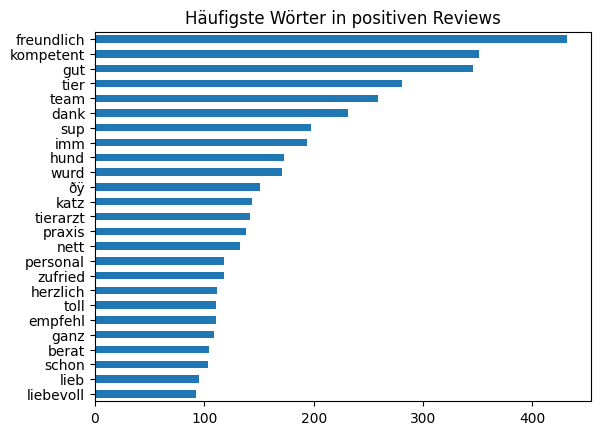

In [ ]:
words = df_positive["word_stems"].value_counts().iloc[0:25]
words.sort_values(inplace=True)
words.plot.barh(title="Häufigste Wörter in positiven Reviews")

In [ ]:
words

liebevoll      92
lieb           95
schon         103
berat         104
ganz          109
empfehl       111
toll          111
herzlich      112
zufried       118
personal      118
nett          133
praxis        138
tierarzt      142
katz          144
ðÿ            151
wurd          171
hund          173
imm           194
sup           198
dank          231
team          259
tier          281
gut           346
kompetent     351
freundlich    432
Name: word_stems, dtype: int64

In [ ]:
df_negative["words"] = df_negative["text"].apply(TweetTokenizer().tokenize)
df_negative = df_negative.explode("words", ignore_index=True)
df_negative["words"] = df_negative["words"].str.lower()

nltk.download('stopwords')
nltk_stopwords_de = nltk.corpus.stopwords.words('german')
df_negative = df_negative[~ df_negative["words"].isin(nltk_stopwords_de)]

punct = string.punctuation
punct_list = [x for x in punct]
add = []
punct_list = punct_list + add

df_negative = df_negative[~ df_negative["words"].isin(punct_list)]
df_negative["word_stems"] = [SnowballStemmer("german").stem(word) for word in df_negative["words"]]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Axes: title={'center': 'Häufigste Wörter in positiven Reviews'}>

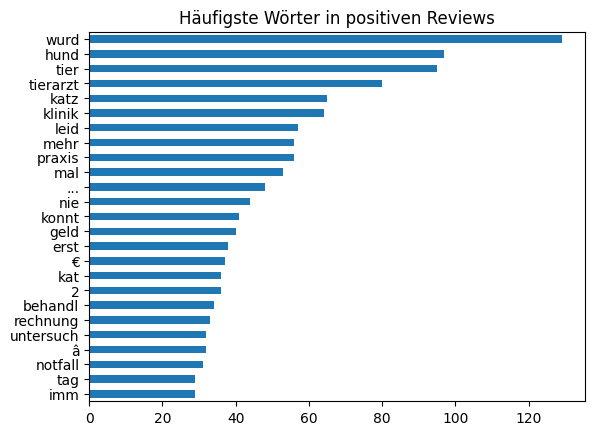

In [ ]:
words = df_negative["word_stems"].value_counts().iloc[0:25]
words.sort_values(inplace=True)
words.plot.barh(title="Häufigste Wörter in positiven Reviews")

In [ ]:
words

imm           29
tag           29
notfall       31
â             32
untersuch     32
rechnung      33
behandl       34
2             36
kat           36
€             37
erst          38
geld          40
konnt         41
nie           44
...           48
mal           53
praxis        56
mehr          56
leid          57
klinik        64
katz          65
tierarzt      80
tier          95
hund          97
wurd         129
Name: word_stems, dtype: int64